In [1]:
import os
import csv
import cv2
import numpy as np
import mediapipe as mp
import math

image_folder = 'test_mediapipe/256img_lst'


In [6]:
import cv2
import mediapipe as mp
import math
import numpy as np

# 初始化MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

# 定义特征点组
ford_head = [54, 284]
low_jaw = [172, 397]
jaw = [234, 454]
long = [175, 10]
ff = long + jaw + low_jaw + ford_head

# 读入图片
image_path = './test_image/max.jpg'  # 替换为你的图片路径
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(image_rgb)

# 定义计算欧几里得距离的函数
def calculate_distance(point1, point2):
    return math.sqrt((point1.x - point2.x)**2 + (point1.y - point2.y)**2 + (point1.z - point2.z)**2)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark
    
    # 绘制特征点及计算距离
    for idx in ff:
        x = int(landmarks[idx].x * image.shape[1])
        y = int(landmarks[idx].y * image.shape[0])
        cv2.circle(image, (x, y), 2, (0, 0, 255), -1)
        cv2.putText(image, f'{idx}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        print(f"{idx}_xyz :x={landmarks[idx].x}/y={landmarks[idx].y}/z={landmarks[idx].z}")
    
    # 计算并显示距离
    groups = [long, jaw, low_jaw, ford_head]
    for group in groups:
        point1 = landmarks[group[0]]
        point2 = landmarks[group[1]]
        distance = calculate_distance(point1, point2)
        mid_x = int((point1.x + point2.x) / 2 * image.shape[1])
        mid_y = int((point1.y + point2.y) / 2 * image.shape[0])
        cv2.putText(image, f'{distance:.2f}', (mid_x, mid_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        print(f"Distance between {group[0]} and {group[1]}: {distance:.2f}")

# 显示图片
cv2.imshow('Image with Face Landmarks', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


c:\Users\User\anaconda3\envs\DL_39\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


175_xyz :x=0.48785853385925293/y=0.6777152419090271/z=-0.018686536699533463
10_xyz :x=0.48241424560546875/y=0.23158210515975952/z=-0.002851009601727128
234_xyz :x=0.3444369435310364/y=0.4508568048477173/z=0.13198204338550568
454_xyz :x=0.6233984231948853/y=0.435413658618927/z=0.13650020956993103
172_xyz :x=0.37535515427589417/y=0.614633321762085/z=0.08428992331027985
397_xyz :x=0.5974426865577698/y=0.6014646887779236/z=0.08768715709447861
54_xyz :x=0.364085853099823/y=0.2941281795501709/z=0.058581382036209106
284_xyz :x=0.600333571434021/y=0.28188398480415344/z=0.0622098371386528
Distance between 175 and 10: 0.45
Distance between 234 and 454: 0.28
Distance between 172 and 397: 0.22
Distance between 54 and 284: 0.24


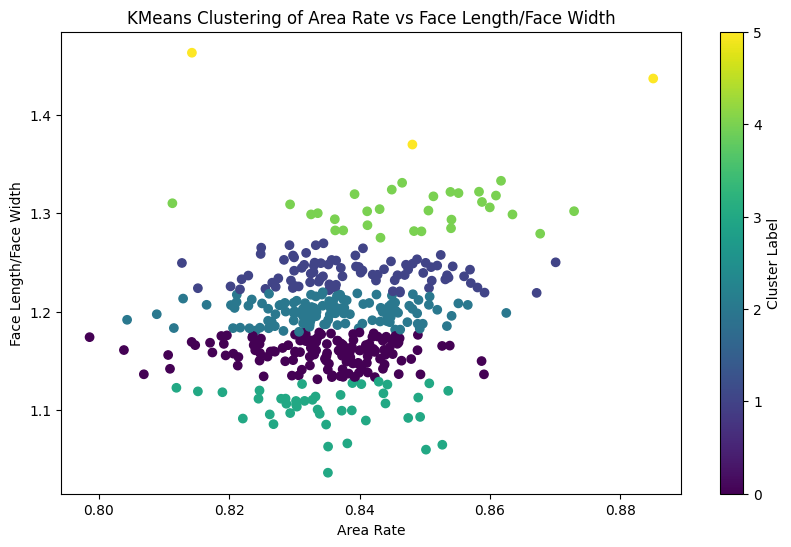

In [4]:
import os
import shutil
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
file_path="./csv_file/face_data_area.csv"
data=pd.read_csv(file_path)

# 假設已經有 data DataFrame 並且包含 'Face Length', 'Face Width', 'Image' 列

# 計算所需的列
data['Face len/wid'] = data['Face Length'] / data['Face Width']

# 提取所需的兩列數據進行分群
features = data[['Area Rate', 'Face len/wid']]

# 使用 KMeans 進行分群
kmeans = KMeans(n_clusters=6, random_state=0).fit(features)
data['Cluster'] = kmeans.labels_

# 創建 output 資料夾及子資料夾
output_dir = '../model_train/face_shape'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for i in range(6):
    cluster_dir = os.path.join(output_dir, f'class_{i}')
    if not os.path.exists(cluster_dir):
        os.makedirs(cluster_dir)

# 將圖片移動到對應的分群資料夾
image_dir = '256img_lst'
for index, row in data.iterrows():
    image_name = row['Image']
    cluster = row['Cluster']
    src_path = os.path.join(image_dir, image_name)
    dest_path = os.path.join(output_dir, f'class_{cluster}', image_name)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)

# 繪製分群後的散點圖
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Area Rate'], data['Face len/wid'], c=data['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster Label')
plt.title('KMeans Clustering of Area Rate vs Face Length/Face Width')
plt.xlabel('Area Rate')
plt.ylabel('Face Length/Face Width')
plt.show()
